In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unittest

from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

np.warnings.filterwarnings('ignore')

In [3]:
# Capture returns not to be printed
k_means_return = None
k_means_pp_return = None
k_medoids_return = None

# Clustering analysis 

<a id='Table_of_Contents'></a>
### Table of Contents

* [Introduction](#Introduction)
* [Abstract](#Abstract)
* [Clusters of points](#Clusters_of_points)
* [Clustering analysis](#Clustering_analysis)
* [Example of clustering analysis in 2D](#Example_of_clustering_analysis_in_2D)
* [Defining clusters](#Defining_clusters)
    * [Hierarchical Clustering](#Hierarchical_Clustering)
    * [Partitional Clustering](#Partitional_Clustering)
    * [Density-Based Clustering](#Density_Based_Clustering)
    
* [Agglomerative Clustering](#Agglomerative_Clustering)
* [K-means clustering](#K_means_clustering) 
    * [How does k-means depend on the initialization?](#How_does_k_means_depend_on_the_initialization)
* [K-Medoids Clustering](#K_Medoids_Clustering)
    * [Distance Metrics](#Distance_Metrics)
* [Unit tests](#Unit_tests)
* [Real life clustering examples](#Real_life_clustering_examples)
    * [Loan Prediction](#Loan_Prediction)
    * [Results](#Results)
* [Final Words](#Final_Words)
* [References](#References)


<a id='Introduction'></a>
### Introduction

We humans are cognitive beings who are eager to learn, understand, explore, classify and so on. Our universe is our laboratory, where our mind finds itself very comfortable doing its explorations and piling up its conclusions. One little grain of that cognitive process is the cluster analysis. So let us make a shallow swim in this sea.

<a id='Abstract'></a>
### Abstract

Imagine you have just started a new job as a bank manager in a town where you are also a newcomer. Your supervising officers ask you to evaluate the loan situation and propose an aggressive policy aiming at significant growth of your portfolio. Your first objective is to have a clear understanding how much in loan it is feasible to offer you clients, based on their yearly income. Of course, there are many other factors you should take into consideration, but for simplicity, let us focus on income. Here comes in help "clustering analysis" to group the prospective debtors in clusters, based on the relation "income - debt amount".
In this project we shall try to understand the theoretical base of this scientific method and use it with a real life data.

<a id='Clusters_of_points'></a>
### Clusters of points

Everything starts with a set of objects. Objects are grouped in such way, based on their similarity, that they form sets, called clusters. We define "clusters of points" as homogeneous subgroups of data points with similar characteristics. As all objects in our world are interconnected and interact with each other it is quite usual objects of a certain type to share similarity in their characteristics. Trying to find an easier way for understanding the environment we inevitably will come to many different solutions and one of them probably would be the clusterization of known data about group of objects.

<a id='Clustering_analysis'></a>
### Clustering analysis

Clustering is the process of grouping similar data points into a cluster. Given a finite set of data points, clustering aims to find. Here we have to distinguish the difference between clustering and classification. Clustering may sound similar to the popular classification type of problems, but unlike classification wherein a labeled set of classes are provided at the time of training, the idea of clustering is to form the classes or categories from the data which is not pre-classified into any set of categories, which is why clustering is an unsupervised learning algorithm. 
A good example here would be a dataset without any predefined features. If we have consumers data about income with "age", "income" and "spending score", we can use clustering to get classes that would categorize the data, based on the features. We may group the consumers, based on income and spending score. Now, if we have had another data column "gender", we can use the dataset to predict whether a certain customer is male or female, based on his data for age, income and score. And this second is classification. 

<a id='Example_of_clustering_analysis_in_2D'></a>
### Example of clustering analysis in 2D

An example of creating and summarizing the synthetic clustering dataset is listed below. Running the example creates the synthetic clustering dataset, then creates a scatter plot of the input data with points colored by class label. We can clearly see two distinct groups of data in two dimensions and the hope would be that an automatic clustering algorithm can detect these groupings.
The dataset will have 1,000 examples, with two input features and one cluster per class. The clusters are visually obvious in two dimensions so that we can plot the data with a scatter plot and color the points in the plot by the assigned cluster. This will help to see, at least on the test problem, how “well” the clusters were identified. The clusters in this test problem are based on a multivariate Gaussian, and not all clustering algorithms will be effective at identifying these types of clusters.

<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>


 1000 elements:

 [[ 1.22515974 -0.95173116]
 [ 1.01630365 -1.72517506]
 [ 0.33534004 -1.7248955 ]
 ...
 [ 1.54270795 -0.05566478]
 [ 0.81664566 -1.2509187 ]
 [ 1.13782254 -1.26151957]]


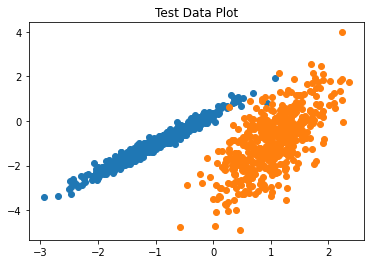

In [4]:

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

print(f'\n {len(X)} elements:\n\n', X)

# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)  # shorthand for np.asarray(y == class_value).nonzero()
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.title('Test Data Plot')
plt.show()

<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>
<a id='Defining_clusters'></a>
### Defining clusters

We can perform clustering using many different approaches — so many, in fact, that there are entire categories of clustering algorithms. Each of these categories has its own unique strengths and weaknesses. This means that certain clustering algorithms will result in more natural cluster assignments depending on the input data.
Selecting an appropriate clustering algorithm for the dataset is often difficult due to the number of choices available. Some important factors that affect this decision include the characteristics of the clusters, the features of the dataset, the number of outliers, and the number of data objects.
Now let us look at three popular categories of clustering algorithms:
 * Hierarchical clustering
 * Partitional clustering
 * Density-based clustering
 
It is worth reviewing these categories at a high level before jumping right into k-means. Learning the strengths and weaknesses of each category to provide context for how k-means fits into the landscape of clustering algorithms.

<a id='Hierarchical_Clustering'></a>
#### Hierarchical Clustering
Hierarchical clustering determines cluster assignments by building a hierarchy. This is implemented by either a bottom-up or a top-down approach:

 * Agglomerative clustering is the bottom-up approach. It merges the two points that are the most similar until all points have been merged into a single cluster.

 * Divisive clustering is the top-down approach. It starts with all points as one cluster and splits the least similar clusters at each step until only single data points remain.

These methods produce a tree-based hierarchy of points called a dendrogram. Similar to partitional clustering, in hierarchical clustering the number of clusters (k) is often predetermined by the user. Clusters are assigned by cutting the dendrogram at a specified depth that results in k groups of smaller dendrograms.

Unlike many partitional clustering techniques, hierarchical clustering is a deterministic process, meaning cluster assignments will not change when you run an algorithm twice on the same input data.

The strengths of hierarchical clustering methods include the following:
 * They often reveal the finer details about the relationships between data objects.
 * They provide an interpretable dendrogram.
 
The weaknesses of hierarchical clustering methods include the following:
 * They are computationally expensive with respect to algorithm complexity.
 * They are sensitive to noise and outliers.

<a id='Partitional_Clustering'></a>
#### Partitional Clustering
Partitional clustering divides data objects into nonoverlapping groups. In other words, no object can be a member of more than one cluster, and every cluster must have at least one object.
These techniques require the user to specify the number of clusters, indicated by the variable ${k}$. Many partitional clustering algorithms work through an iterative process to assign subsets of data points into k clusters. Two examples of partitional clustering algorithms are ${k-means}$ and ${k-medoids}$.
These algorithms are both nondeterministic, meaning they could produce different results from two separate runs even if the runs were based on the same input.

Partitional clustering methods have several strengths:
 * They work well when clusters have a spherical shape.
 * They are scalable with respect to algorithm complexity.

They also have several weaknesses:
 * They are not well suited for clusters with complex shapes and different sizes.
 * They break down when used with clusters of different densities.

<a id='Density_Based_Clustering'></a>
#### Density-Based Clustering
Density-based clustering determines cluster assignments based on the density of data points in a region. Clusters are assigned where there are high densities of data points separated by low-density regions.

Unlike the other clustering categories, this approach does not require the user to specify the number of clusters. Instead, there is a distance-based parameter that acts as a tunable threshold. This threshold determines how close points must be to be considered a cluster member.

Examples of density-based clustering algorithms include Density-Based Spatial Clustering of Applications with Noise, or DBSCAN, and Ordering Points To Identify the Clustering Structure, or OPTICS.

The strengths of density-based clustering methods include the following:
 * They excel at identifying clusters of nonspherical shapes.
 * They are resistant to outliers.

The weaknesses of density-based clustering methods include the following:
 * They are not well suited for clustering in high-dimensional spaces.
 * They have trouble identifying clusters of varying densities.
 
<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>

<a id='Agglomerative_Clustering'></a>
### Agglomerative Clustering

Agglomerative clustering involves merging examples until the desired number of clusters is achieved. It is a part of a broader class of hierarchical clustering methods It is implemented via the AgglomerativeClustering class and the main configuration to tune is the “n_clusters” set, an estimate of the number of clusters in the data, e.g. 2.

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster. In this case, a reasonable grouping is found.

<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>

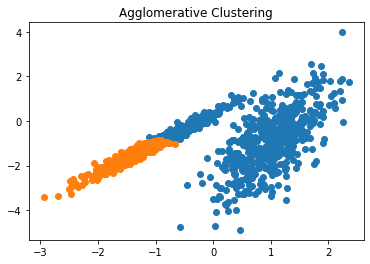

In [5]:
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.title("Agglomerative Clustering")
plt.show()

<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>
<a id='K_means_clustering'></a>
### K-means clustering

K-means clustering is a clustering method that subdivides a dataset into K different clusters or groups. 

The algorithm analyzes the data to find organically similar data points and assigns each point to a cluster that consists of points with similar characteristics. Each cluster can then be used to label the data into different classes based on the characteristics of the data. K-Means clustering works by constantly trying to find a centroid with closely held data points. This means that each cluster will have a centroid and the data points in each cluster will be closer to its centroid compared to the other centroids. Here we are trying to find the best fit based on "Euclidean distance": $$ d = \sqrt{(x_B-x_A)^2 + (y_B-y_A)^2} = \sqrt{(\Delta x)^2 + (\Delta y)^2} $$

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" width="350">

Actually the algorithm is not so complicated and it is quite intuitive:

1. Select an appropriate value for K which is the number of clusters or centroids.
2. Select random centroids for each cluster.
3. Assign each data point to its closest centroid.
4. Adjust the centroid for the newly formed cluster in previous step
5. Repeat steps 4 and 5 till all the data points are perfectly organized within a cluster space.

In other terms, the goal of the k-means algorithm is to maximize the distance between each pair of clusters centers and minimize the distance between observations within each cluster (e.g., minimize the sum of squared error, SSE, within a cluster.).

<img src="K-Means.png" width="550">

We can expect that the best premises for k-means to work well are:
1. The distribution variance of each attribute is spherical.
2. Clusters are linearly separable.
3. Clusters have similar numbers of observations(closer size.).
4. Variables present the same variance.

However, if one of these assumptions is broken, it does not necessarily mean that k- means would fail in clustering the observations since the only purpose of the algorithm is to minimize the sum of squared errors (SSE).

An example with four clusters is shown below:
<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>

In [6]:
def k_means(data_set, clusters, x_lbl="X Axis", y_lbl="Y Axis"):
    # define the model
    model = KMeans(n_clusters=clusters)
    # fit the model
    model.fit(data_set)
    # assign a cluster to each example
    yhat = model.predict(data_set)
    # retrieve unique clusters
    clusters = np.unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = np.where(yhat == cluster)
        # create scatter of these samples
        plt.scatter(data_set[row_ix, 0], data_set[row_ix, 1])
    #Scatter plotting the centroids with label = 'Centroids' in color c = cyan and points in size s = 60
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 60, c = 'cyan', label = 'Centroids')
    # show the plot
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    plt.legend()
    plt.title("K-Means Clusters")
    plt.show()
    print("Cluster centers:")
    print(model.cluster_centers_)
    
    return model.cluster_centers_

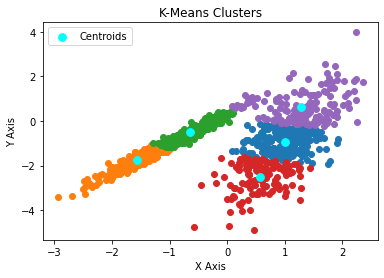

Cluster centers:
[[ 1.00915832 -0.93945019]
 [-1.55927156 -1.75919946]
 [-0.6378727  -0.51544722]
 [ 0.57059706 -2.53421035]
 [ 1.2785432   0.64880198]]


In [7]:
# define dataset and number of clusters
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
k_means_clusters = 5
# call k-means function
k_means_return = k_means(X, k_means_clusters)

<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>
<a id='How_does_k_means_depend_on_the_initialization'></a>
#### How does k-means depend on the initialization? 

##### Let us try to reduce the dependency on the initialization and choose the right number of clusters.
The number of clusters that we choose for a given dataset cannot be random. Each cluster is formed by calculating and comparing the distances of data points within a cluster to its centroid. An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares. WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The idea is to minimize the sum and yet have enough distinctive clusters to serve as base for our needs. If the number of clusters equals number of entries in a dataset WCSS would be zero, and all the points would become centroids, which does not make sense. If the number is one we are assuming that the whole dataset is one cluster, which is also unacceptable. We can formally put this method assuming that ${C}$  is the cluster centroids, ${n}$  is the number of entries in the dataset, ${k}$  is the number of clusters and  ${d}$  is the data point in each cluster.

$$ WCSS = \sum_{C_k}^{C_n}\left(\sum_{d_i\ in\ C_i}^{d_m}distance\left(d_i, C_k\right)^2\right) $$

Our task is finding the optimum value and here we use the Elbow method, where randomly initialize the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value. We are looking for a number of clusters, after which the drop in WCSS is minimal. If you examine the following graph: <img src="Elbow_graph.png" width="450"> you will notice that our favorite would be number five, because no significant drop occurs after it.

##### But be careful not to get into the "Random Initialization Trap":
One major drawback of K-Means clustering is the random initialization of centroids. The formation of clusters is closely bound by the initial position of a centroid. The random positioning of the centroids can completely alter clusters and can result in a random formation. The solution is K-means++. K-Means++ is an algorithm that is used to initialize the K-Means algorithm.

##### K Means++ - an advanced algorithm to avoid the trap is as follows:

1. Choose one centroid uniformly at random from among the data points.
2. For each data point say x, not chosen yet, compute $D(x)$, which is the distance between x and the nearest centroid that has already been chosen.
3. Choose one new data point at random as a new centroid, using a weighted probability distribution where a point x is chosen with probability proportional to $D(x)^2$.
4. Repeat Steps 2 and 3 until $k$ centers have been chosen.
5. Proceed with standard k-means clustering.

In the next two code cells we implement those additional steps (i.e. elbow method and k-means++) and hopefully find that the best number of clusters for this dataset.

<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>

In [8]:
def wcss(data_set, x_lbl="X Axis", y_lbl="Y Axis"):
    # Using the elbow method to find the optimal number of clusters
    wcss = []
    for i in range(1, 11):
       kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
       kmeans.fit(data_set)
       #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
       wcss.append(kmeans.inertia_)  

    # Plotting The Elbow graph
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Point Graph')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Scatter plotting the centroids with label = 'Centroids' in color r = red and points in size s = 60
    plt.scatter(data_set[:, 0], data_set[:, 1])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 60, c = 'red', label = 'Calculated centroids')
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    plt.legend()
    plt.title("Calculated Centroids")
    plt.show()

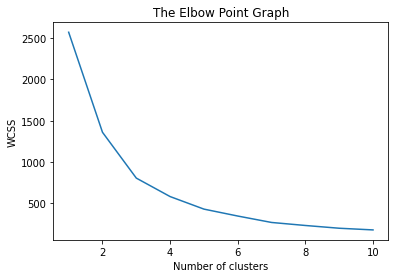

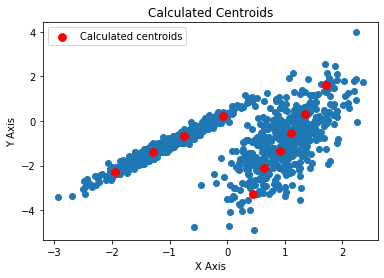

In [9]:
wcss(X) # called with "sklearn.datasets.make_classification" Dataset

In [10]:
def k_means_pp(data_set, clusters, x_lbl="X Axis", y_lbl="Y Axis"):
    # define the model
    model = KMeans(n_clusters=clusters, init='k-means++', random_state= 0)
    # fit the model
    model.fit(data_set)
    # assign a cluster to each example
    yhat = model.predict(data_set)
    # retrieve unique clusters
    clusters = np.unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = np.where(yhat == cluster)
        # create scatter of these samples
        plt.scatter(data_set[row_ix, 0], data_set[row_ix, 1])
    #Scatter plotting the centroids with label = 'Centroids' in color c = cyan and points in size s = 60
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 60, c = 'cyan', label = 'Centroids')
    # show the plot
    plt.legend()
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    plt.title("K-Means++ Clusters")
    plt.show()
    print("Cluster centers:")
    print(model.cluster_centers_)
    return model.cluster_centers_

In [11]:
k_means_pp_clusters = 5

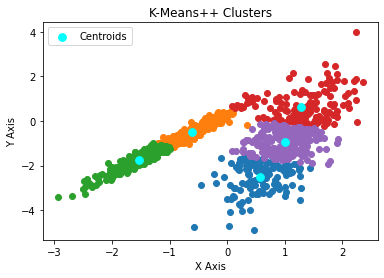

Cluster centers:
[[ 0.57059706 -2.53421035]
 [-0.61271075 -0.4869962 ]
 [-1.53805996 -1.72911897]
 [ 1.2785432   0.64880198]
 [ 1.01211865 -0.94281441]]


In [12]:
k_means_pp_return = k_means_pp(X, k_means_pp_clusters) # called with "sklearn.datasets.make_classification" Dataset and five clusters

<a id='K_Medoids_Clustering'></a>
### K-Medoids Clustering


The K-means clustering algorithm is sensitive to outliers, because a mean is easily influenced by extreme values. K-medoids clustering is a variant of K-means that is more robust to noises and outliers. Instead of using the mean point as the center of a cluster, K-medoids uses an actual point in the cluster to represent it. Medoid is the most centrally located object of the cluster, with minimum sum of distances to other points. Figure 1 shows the difference between mean and medoid in a 2-D example. The group of points in the right form a cluster, while the rightmost point is an outlier. Mean is greatly influenced by the outlier and thus cannot represent the correct cluster center, while medoid is robust to the outlier and correctly represents the cluster center. The following picture is quite self-explanatory: <img src="Medoids.png" width="500">
<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>

K-Medoids algorithm can be used with arbitrarily chosen dissimilarity measure (e.g. cosine similarity) or any distance metric, unlike K-Means which usually needs Euclidean distance metric to arrive at efficient solutions.

K-Medoids algorithm is found useful for practical applications such as face recognition. The medoid can correspond to the typical photo of the individual whose face is to be recognized. But if K-Means algorithm is used instead, some blurred image may get assigned as the centroid, which has mixed features from several photos of the individual and hence makes the face recognition task difficult.

The implementation below is a demonstration of K-Medoids algorithm on a dataset containing 8*8 dimensional images of handwritten digits. The task is to divide the data points into 10 clusters (for classes 0-9) using K-Medoids. The dataset used in this example is a copy of the test set of the [original dataset](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) available on [UCI ML Repository](https://archive.ics.uci.edu/).

<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>

In [13]:
# Import required libraries and modules.
from sklearn_extra.cluster import KMedoids
# Import the digits dataset available in sklearn.datasets package
from sklearn.datasets import load_digits
"""
Instead of using all 64 attributes of the dataset, we use Principal Component Analysis (PCA) to reduce the dimensions of features set such that most of the useful information is covered.
"""
from sklearn.decomposition import PCA
"""
Import module for standardizing the dataset i.e. rescaling the data such that its has mean of 0 and standard deviation of 1
"""
from sklearn.preprocessing import scale 

# Prepare the input data 
# Load the digits dataset 
dataset = load_digits()
# Standardize the data
digit_data = scale(dataset.data)
"""
Compute number of output classes i.e. number of digits for which we have the data (here 10 (0-9))
"""
num_digits = len(np.unique(dataset.target)) 


# Reduce the dimensions of the data using PCA
red_data = PCA(n_components=2).fit_transform(digit_data)
"""
PCA constructs new components by linear combinations of original features. ‘n_components’ parameter denotes the number of newly formed components to be considered. fit_transform() method fits the PCA models and performs dimensionality reduction on digit_data.
""" 

# Plot the decision boundaries for each cluster. Assign a different color to each for differentiation
h = 0.02 #step size of the mesh 
# Minimum and maximum x-coordinates
xmin, xmax = red_data[:, 0].min() - 1, red_data[:, 0].max() + 1
# Minimum and maximum y-coordinates
ymin, ymax = red_data[:, 1].min() - 1, red_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h)) 


<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>
<a id='Distance_Metrics'></a>
#### Distance Metrics

Further we define an array of K-Medoids variants to be used. We have used three different distance metrics (Manhattan distance (taxicab distance), Euclidean distance and Cosine dissimilarity/distance) for computing the distance of each data point from every other data point while selecting the medoid. In brief we can explain the metrics as follows:
* Manhattan distance is calculated using this formula $$ distance = \sum_{i=1}^{n}|x_i - y_i| $$ and is visualized bu this picture <img src="Manhatan.png" width="200"> $$ $$ 
* Euclidean distance is calculated using this formula $$ d\left(x, y\right) = \sqrt{\sum_{i=1}^{n}\left(x_i - y_i\right)^2} $$ and is visualized bu this picture <img src="Euclidean.png" width="500"> $$ $$
* Cosine Distance & Cosine Similarity metric is mainly used to find similarities between two data points. As the cosine distance between the data points increases, the cosine similarity, or the amount of similarity decreases, and vice versa. Cosine similarity is given by $\cos\ \theta^{\circ}$, and cosine distance is $1 - \cos\ \theta^{\circ}$. Here is an example: <img src="Cosine.png" width="400"> In the above figure, imagine the value of $\theta$ to be 60 degrees, then by cosine similarity formula, $\cos\ 60^{\circ} = 0.5$ and Cosine distance is $1 - 0.5 = 0.5$. Therefore the points are 50% similar to each other. If $\theta = 90^{\circ}$ the points are 0% similar, and if $\theta = 0^{\circ}$ then we can interpret that the two points are 100% similar to each other.This type of metrics is useful for Collaborative Filtering based recommendation systems to offer future recommendations to users.$$ $$


Visit [this](https://medium.com/@kunal_gohrani/different-types-of-distance-metrics-used-in-machine-learning-e9928c5e26c7#:~:text=Manhattan%20distance%20is%20usually%20preferred,similarity%20between%20two%20data%20points.) page to learn about the distance metrics used in detail.
The parameters we have specified in the KMedoids() method have the following significance:

* metric – distance metric to be used (default: 'euclidean')
* n_clusters – number of clusters to be formed and hence the number of medoids (one per cluster) (default value: 8)
* init – 'heuristic' method used for medoid initialization

For each data point, its distance from all other points is computed and the distances are summed up. N_clusters number of points for which such a sum of distances are minimum, are chosen as medoids.

* max_iter – maximum number of the algorithm's iterations to be performed when fitting the data

The KMedoids() method of scikit-learn-extra by default used the PAM (Partition Around Medoids) algorithm for finding the medoids.

<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>

In [14]:
def k_medoids(data_set, clusters, data_set_name):
    output = {}
    models = [
         (KMedoids(metric="manhattan", n_clusters=clusters, init="heuristic", max_iter=2),"Manhattan (taxicab) metric"),
         (KMedoids(metric="euclidean", n_clusters=clusters, init="heuristic", max_iter=2),"Euclidean metric"),
         (KMedoids(metric="cosine", n_clusters=clusters, init="heuristic", max_iter=2), "Cosine metric"),
    ] 

    # Initialize the number of rows and columns of the plot for plotting subplots of each of the three metrics’ results
    # number of rows = integer(ceiling(number of model variants/2))
    num_rows = int(np.ceil(len(models) / 2.0))
    # number of columns
    num_cols = 2 

    # Fit each of the model variants to the data and plot the resultant clustering
    # Clear the figure first (if any) (also plt.clf() if using window and want to keep it open)
    plt.close()
    # Initialize dimensions of the plot
    plt.figure(figsize=(15,10))
    """
    The ‘models’ array ontains three tuples, each having a model variant’s parameters and its descriptive text. We iterate through each of the tuples, fit the data to the model and plot the results.
    """
    for i, (model, description) in enumerate(models):
        # Fit each point in the mesh to the model
        model.fit(data_set)
        # Predict the labels for points in the mesh
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        # Put the result  into a color plot
        Z = Z.reshape(xx.shape)
        # Subplot for the ith model variant
        plt.subplot(num_cols, num_rows, i + 1)
        # Display the subplot
        plt.imshow(
             Z,    # data to be plotted
             interpolation="nearest",  # bounding box coordinates (left,right,bottom,top)
             extent=(xx.min(), xx.max(), yy.min(), yy.max()),
             cmap=plt.cm.Paired,  # colormap
             aspect="auto", # aspect ratio of the axes
             origin="lower",  # set origin as lower left corner of the axes
        )
        plt.plot(data_set[:, 0], data_set[:, 1], "k.", markersize=2, alpha=0.3)
        # Plot the centroids as white cross marks
        centroids = model.cluster_centers_
        plt.scatter(
             centroids[:, 0],
             centroids[:, 1],
             marker="x",
             s=169,  # marker’s size (points^2)
             linewidths=3, # width of boundary lines
             color="w",  # white color for centroids markings
             zorder=10,  # drawing order of axes
        )
        # describing text of the tuple will be title of the subplot
        plt.title(description)  
        plt.xlim(xmin, xmax)  # limits of x-coordinates
        plt.ylim(ymin, ymax)  # limits of y-coordinates
        plt.xticks(())   
        plt.yticks(())
        output[description] = model.cluster_centers_

    # Upper title of the whole plot
    plt.suptitle(f" K-Medoids algorithm implemented with different metrics for \"{data_set_name}\" Dataset ""\n\n ", fontsize=20)
    plt.show()
    
    for description, centroids in output.items():
        print(f'\nCluster centers for {description}:\n{"="*(len(description)+21)}\n{centroids}\n')
        
    return output.values()


In [15]:
k_medoids_clusters = 5

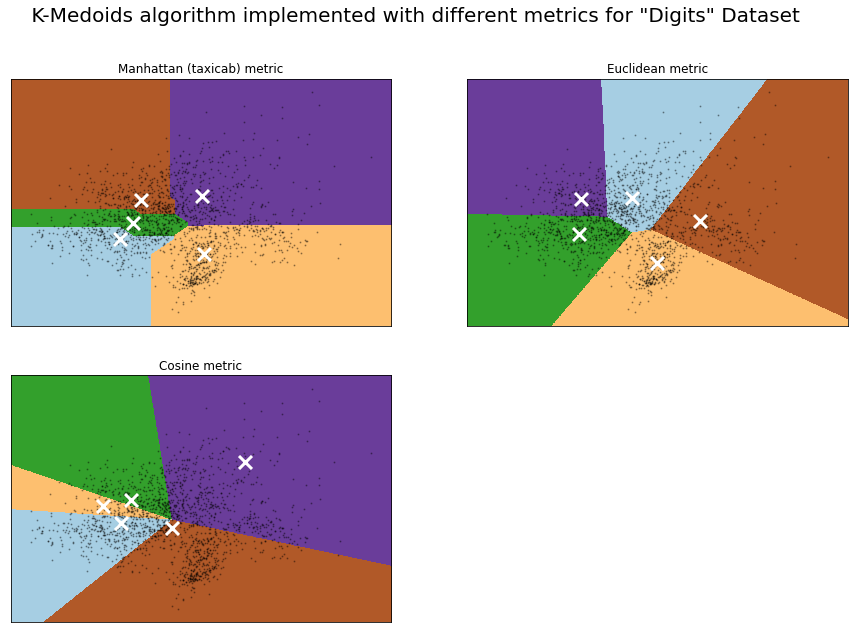


Cluster centers for Manhattan (taxicab) metric:
[[-2.56931075 -1.18242499]
 [-1.89783016  0.06020743]
 [ 1.63352742 -2.29135665]
 [ 1.56424327  2.03412178]
 [-1.49756787  1.74970382]]


Cluster centers for Euclidean metric:
[[ 0.2180879   1.94336988]
 [-2.41874035 -0.75742632]
 [ 1.452642   -2.96731695]
 [-2.33199175  1.87013997]
 [ 3.62019881  0.19173143]]


Cluster centers for Cosine metric:
[[-2.47569892 -0.23699109]
 [-1.99014421  1.52895108]
 [-3.38727901  1.01703613]
 [ 3.67175099  4.37489253]
 [ 0.0497313  -0.57898915]]



In [16]:
k_medoids_return = k_medoids(red_data, k_medoids_clusters, 'Digits') # Digits Dataset

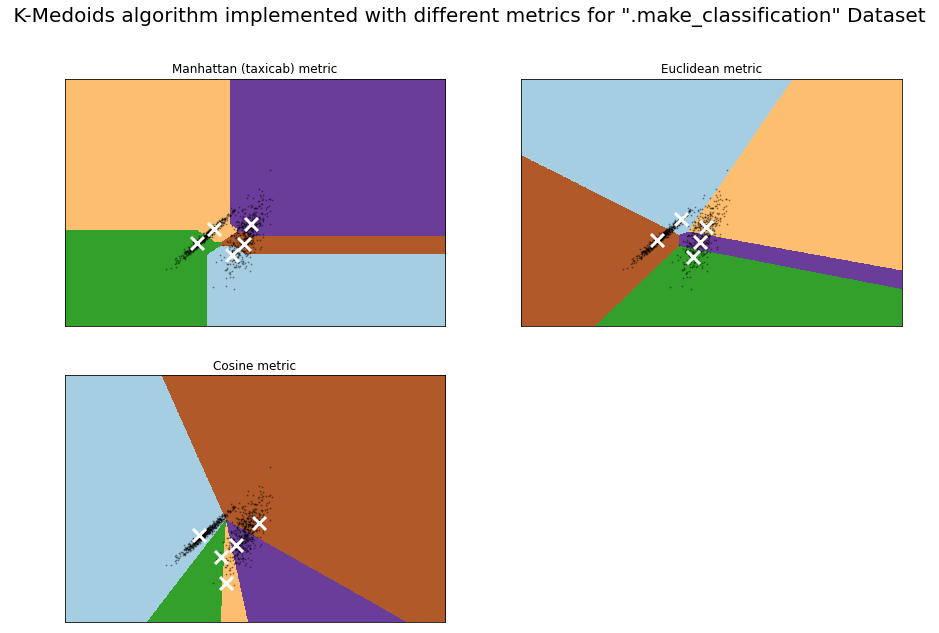


Cluster centers for Manhattan (taxicab) metric:
[[ 0.37070084 -2.35695259]
 [-1.38958944 -1.48854911]
 [-0.53150026 -0.38388278]
 [ 1.28092868 -0.00606293]
 [ 0.93591823 -1.56470132]]


Cluster centers for Euclidean metric:
[[-0.00910121  0.31259115]
 [ 0.59056877 -2.51485219]
 [ 1.2304265  -0.25004974]
 [ 0.92620865 -1.36275469]
 [-1.211419   -1.26856107]]


Cluster centers for Cosine metric:
[[-1.30382351 -1.09244381]
 [-0.20108405 -2.76642024]
 [ 0.02620621 -4.71323682]
 [ 0.54804027 -1.89126361]
 [ 1.68905212 -0.20959088]]



In [17]:
k_medoids_return = k_medoids(X, k_medoids_clusters, '.make_classification') # "sklearn.datasets.make_classification" Dataset

As you see different type of metrics produce to some extent completely different clusterization. Please, have in mind that in this project only three of them are shown. In fact the metrics could be much more and even a custom one created by us for a certain purpose. It is very good to have such a big choice of tools, but be careful: "Which result exactly fits your research, and aren't you misled by an inappropriate cluterization?"


<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>
<a id='Unit_tests'></a>
### Unit tests

Now it comes the time for some testing. The code below is just an example of this process. It tests the lengths of the returns of functions compared to the arguments provided:

In [18]:

class TestProject(unittest.TestCase):
    def test_k_means_return(self):
        the_return = k_means_return
        self.assertEqual(len(the_return), k_means_clusters)

    def test_k_means_pp_return(self):
        the_return = k_means_pp_return
        self.assertEqual(len(the_return), k_means_pp_clusters)

    def test_k_medoids_return_0(self):
        the_return = list(k_medoids_return)[0]
        self.assertEqual(len(the_return), k_medoids_clusters)
        
    def test_k_medoids_return_1(self):
        the_return = list(k_medoids_return)[1]
        self.assertEqual(len(the_return), k_medoids_clusters)
        
    def test_k_medoids_return_2(self):
        the_return = list(k_medoids_return)[2]
        self.assertEqual(len(the_return), k_medoids_clusters)

unittest.main(argv=[''], verbosity=2, exit=False)

test_k_means_pp_return (__main__.TestProject) ... ok
test_k_means_return (__main__.TestProject) ... ok
test_k_medoids_return_0 (__main__.TestProject) ... ok
test_k_medoids_return_1 (__main__.TestProject) ... ok
test_k_medoids_return_2 (__main__.TestProject) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.016s

OK


<a id='Real_life_clustering_examples'></a>
### Real life clustering examples

Here in brief let us mention some real life applications of clustering:
1. <b>Identifying Fake News.</b> The way that the algorithm works is by taking in the content of the fake news article, the corpus, examining the words used and then clustering them. These clusters are what helps the algorithm determine which pieces are genuine and which are fake news. Certain words are found more commonly in sensationalized, click-bait articles. When you see a high percentage of specific terms in an article, it gives a higher probability of the material being fake news. 
2. <b>Spam filter.</b> K-Means clustering techniques have proven to be an effective way of identifying spam. The way that it works is by looking at the different sections of the email (header, sender, and content). The data is then grouped together. These groups can then be classified to identify which are spam. Including clustering in the classification process improves the accuracy of the filter to 97%. This is excellent news for people who want to be sure they are not missing out on your favorite newsletters and offers.
3. <b>Marketing and Sales.</b> Clustering algorithms are able to group together people with similar traits and likelihood to purchase. Once you have the groups, you can run tests on each group with different marketing copy that will help you better target your messaging to them in the future.
4. <b>Classifying network traffic.</b> K-means clustering is used to group together characteristics of the traffic sources. When the clusters are created, you can then classify the traffic types. By having precise information on traffic sources, you are able to grow your site and plan capacity effectively.
5. <b>Identifying fraudulent or criminal activity.</b> By analyzing the GPS logs, the algorithm is able to group similar behaviors. Based on the characteristics of the groups you are then able to classify them into those that are real and which are fraudulent.
6. <b>Document analysis.</b> Hierarchical clustering has been used to solve this problem. The algorithm is able to look at the text and group it into different themes. Using this technique, you can cluster and organize similar documents quickly using the characteristics identified in the paragraph.
7. <b>Fantasy Football and Sports.</b> In this type of machine learning problem, you can find similar players using some of their characteristics. This has been done using K-Means clustering. Ultimately this means you can get a better team more quickly at the start of the year, giving you an advantage.

<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>

<a id='Loan_Prediction'></a>
#### Loan Prediction

Our further research goes through a real data set available at [Google Drive](https://drive.google.com/file/d/1ZzEouo7lRJvajxK6jLM2K_p9xAwGw1tS/view). It contains anonymous information sample about properties and amounts in debt for certain bank clients. For our research we shall use only two of the columns of the dataset: "ApplicantIncome" and "LoanAmount". We shall use the "Elbow" method to decide the optimal number of centroids. Further we shall examine this data by "K-Means" and "K-Means++" methods and finally we shall find that both algorithms produce identical results, except the order of finding of the centroids.

In [19]:
# Loan prediction example
data = pd.read_csv('loan_prediction_db.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


<class 'pandas.core.frame.DataFrame'>


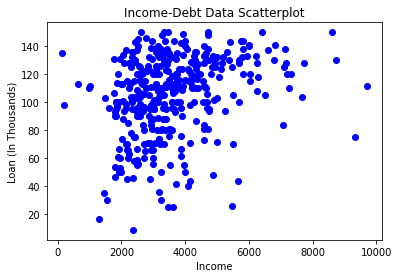

     ApplicantIncome  LoanAmount
0               4583       128.0
1               3000        66.0
2               2583       120.0
3               6000       141.0
4               2333        95.0
..               ...         ...
376             5703       128.0
377             3232       108.0
378             2900        71.0
379             4106        40.0
380             4583       133.0

[381 rows x 2 columns]


In [28]:
# “LoanAmount” and “ApplicantIncome” columns picked for analysis
X2 = data[["ApplicantIncome", "LoanAmount"]]
print(type(X2))
#Visualise data points
plt.scatter(X2["ApplicantIncome"],X2["LoanAmount"],c='blue')
plt.xlabel('Income')
plt.ylabel('Loan (In Thousands)')
plt.title("Income-Debt Data Scatterplot")
plt.show()
print(X2)

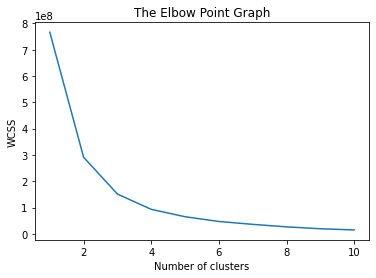

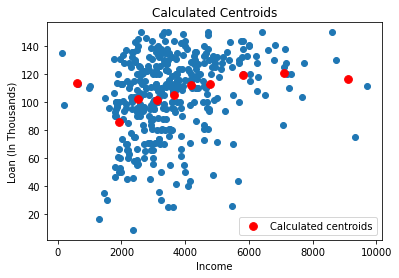

In [21]:
wcss(X2.to_numpy(), "Income", "Loan (In Thousands)")

In [22]:
k_means_clusters = 3

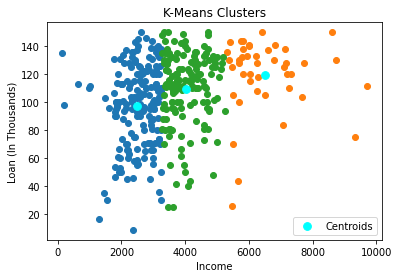

Cluster centers:
[[2497.97252747   97.47252747]
 [6512.76744186  119.48837209]
 [4033.59615385  109.75641026]]


In [23]:
k_means_return = k_means(X2.to_numpy(), k_means_clusters, "Income", "Loan (In Thousands)")

In [24]:
k_means_pp_clusters = 3

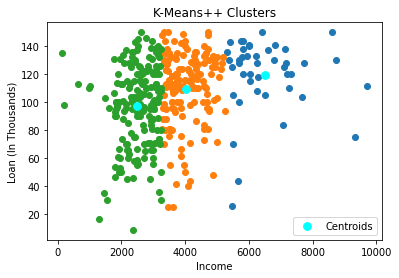

Cluster centers:
[[6512.76744186  119.48837209]
 [4033.59615385  109.75641026]
 [2497.97252747   97.47252747]]


In [25]:
k_means_pp_return = k_means_pp(X2.to_numpy(), k_means_pp_clusters, "Income", "Loan (In Thousands)")

<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>
<a id='Results'></a>
#### Results

We already have three centroids as we wished, based on observation of the "Elbow" graph, which we can hypothetically use to predict the loan amount of a bank client in relation to his annual income. But this is only one property that we have taken into consideration. We always have to examine carefully all known information in order to gain a broader view of the situation, before make the conclusions.

<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>
<a id='Final_Words'></a>
### Final Words

The end of the project is near but there are so many other things that could add value. 
Just in brief, we could examine the distances inside the clusters and between them. We can see with naked eye that centroids are closer to each other compared to the spread of points inside each cluster. Here comes in place further analysis about outliers and examining the other available data. 
We can also try to determine our custom metric to group the points maybe in better organized clusters.   
We can also dive deeper in theory and come across another method that fits better our purpose. Who knows?
That is the reason we have future to continue what was already started.

<a href="#Table_of_Contents" style="float: right;">Table of Contents</a>
<a id='References'></a>
##### References:

1. https://machinelearningmastery.com/clustering-algorithms-with-python/
0. https://realpython.com/k-means-clustering-python/
0. https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/
0. https://analyticsindiamag.com/comprehensive-guide-to-k-medoids-clustering-algorithm/
0. https://en.wikibooks.org/wiki/LaTeX/Mathematics
0. https://en.wikipedia.org/wiki/K-means%2B%2B
0. https://scikit-learn.org/stable/
0. https://link.springer.com/referenceworkentry/10.1007%2F978-0-387-30164-8_426
0. https://medium.com/@kunal_gohrani/different-types-of-distance-metrics-used-in-machine-learning-e9928c5e26c7#:~:text=Manhattan%20distance%20is%20usually%20preferred,similarity%20between%20two%20data%20points.
0. https://archive.ics.uci.edu/ml/index.php
0. https://towardsdatascience.com/17-clustering-algorithms-used-in-data-science-mining-49dbfa5bf69a
0. https://datafloq.com/read/7-innovative-uses-of-clustering-algorithms/6224
0. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
0. Data Science from Scratch by Joel Grus, Copyright © 2015 O’Reilly Media.
0. Machine Learning Mastery With Python © Copyright 2016 Jason Brownlee.